In [2]:
import pandas as pd
%matplotlib inline

In [3]:
df = pd.read_csv('Retail_Asset_List.csv', index_col = "Asset ID", parse_dates=True)
df.head()

Brand   Location                                   Name  \
Asset ID                                                             
5932      Reebok  Indonesia          PT Leading Garment Industries   
7859      Adidas    Vietnam  Pouyuen Vietnam Company Limited (PYV)   
8144      Reebok    Vietnam     Kanaan Saigon Co., Ltd (2nd Plant)   
8815      Adidas   Pakistan              Style Textile (Pvt), Ltd.   
8926      Reebok     Taiwan           Wei Lee Knitting MFG. Co Ltd   

                                      Address 1                  Address 2  \
Asset ID                                                                     
5932                         JL. Mengger No. 97  Moh. Toha KM 5,6 Bandung    
7859      D10/89Q National road 1A Tan Tao ward          Binh Tan District   
8144                           Binh Ta 1 Hamlet         Duc Hoa Ha Village   
8815        126/3-Kot Lakhpat Industrial Estate                    (blank)   
8926                     NO. 100, Hengche Road,               Pei Miao Li,   

                       Address 3                   City Zip Code  \
Asset ID                                                           
5932      Pasawahan, Dayeuhkolot                Bandung    40256   
7859            Ho Chi Minh city  Thanh pho Ho Chi Minh     7000   
8144                     (blank)           Duc Hoa Town   850000   
8815                     (blank)                 Lahore    54770   
8926                     (blank)           MiaoLi City,    36045   

              Private Tier               Province Product Categories  \
Asset ID                                                               
5932      Tier 1 - Primary             Jawa Barat            Apparel   
7859      Tier 1 - Primary  Thanh pho Ho Chi Minh           Footwear   
8144      Tier 1 - Primary                Long An        Accessories   
8815      Tier 1 - Primary                 Punjab            Apparel   
8926      Tier 1 - Primary                 Taiwan        Accessories   

          Employees           Asset Type  
Asset ID                                  
5932          320.0  Distribution Centre  
7859         1512.0              Factory  
8144           71.0  Distribution Centre  
8815          499.0              Factory  
8926           17.0                Store

In [5]:
df.tail()

Brand       Location  \
Asset ID                          
86844     Reebok          China   
86941     Adidas  United States   
87031     Reebok          China   
87266     Adidas          India   
87631     Adidas         Turkey   

                                                       Name  \
Asset ID                                                      
86844                     Jiangsu Huansheng Apparel Co.,Ltd   
86941                            Riddell Sports Group, Inc.   
87031                               Jiangsu Dali STT Co Ltd   
87266     Camphor Shoes (India) Private Limited Expanded...   
87631            ERATEKS Tekstil San Ve Tic.AŞ Fatsa Şube 2   

                                                  Address 1    Address 2  \
Asset ID                                                                   
86844     SIHONG  ECONOMIC  DEVELOPMENT AREA,SHUANGYANG ...      (blank)   
86941                                 7501 Performance Lane      (blank)   
87031     No 2 Building, Smart Knitting Industrial Park,...      (blank)   
87266     APIIC Industrial park (Apache SEZ Development)...  Tada Mandal   
87631                            Fatsa OSB 101.Sok.No:15/3       (blank)   

                      Address 3              City Zip Code  \
Asset ID                                                     
86844                   (blank)            Suqian  (blank)   
86941                   (blank)  North Ridgeville    44039   
87031                   (blank)            Suqian   223600   
87266     SPSR Nellore District       Tada Mandal   524401   
87631                   (blank)             Fatsa  (blank)   

                    Private Tier        Province Product Categories  \
Asset ID                                                              
86844           Tier 1 - Primary         (blank)            Apparel   
86941           Tier 1 - Primary            Ohio               Gear   
87031           Tier 1 - Primary         Jiangsu            Apparel   
87266     Tier 2 – Subcontractor  Andhra Pradesh           Footwear   
87631           Tier 1 - Primary            Ordu            Apparel   

          Employees Asset Type  
Asset ID                        
86844          10.0      Store  
86941          36.0      Store  
87031          24.0      Store  
87266          43.0      Store  
87631          10.0      Store

In [6]:
df.describe()

Employees
count   971.000000
mean     93.832132
std     197.001773
min       0.000000
25%       5.000000
50%      23.000000
75%      91.000000
max    2234.000000

In [7]:
df.describe().transpose()


count       mean         std  min  25%   50%   75%     max
Employees  971.0  93.832132  197.001773  0.0  5.0  23.0  91.0  2234.0

In [8]:
df["Brand"].nunique()

2

In [9]:
print(df["Brand"].unique())

['Reebok' 'Adidas']


In [10]:
df[ df['Location'] == "China" ].shape

(244, 13)

In [ ]:
df[ df['Employees'] > 500 ].shape

In [23]:
df_combined_locs = df[ (df['Location'] == "China") | (df['Location'] == "Vietnam") | (df['Location'] == "United States") ]

df_combined_locs[ ["Asset Type", "City", "Brand"] ]

Asset Type                   City   Brand
Asset ID                                                    
7859                  Factory  Thanh pho Ho Chi Minh  Adidas
8144      Distribution Centre           Duc Hoa Town  Reebok
12384     Distribution Centre       Ho Chi Minh City  Adidas
13017                   Store              Zhongshan  Adidas
13599                   Store       Ho Chi Minh City  Reebok
...                       ...                    ...     ...
86698                 Factory              Hai Phong  Adidas
86706     Distribution Centre        Cam My District  Reebok
86844                   Store                 Suqian  Reebok
86941                   Store       North Ridgeville  Adidas
87031                   Store                 Suqian  Reebok

[403 rows x 3 columns]

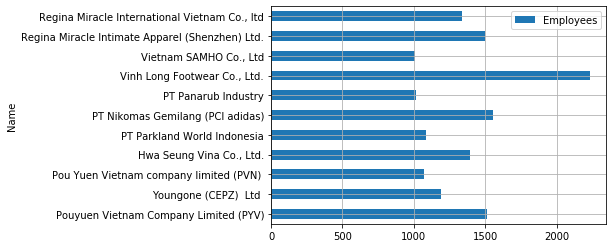

In [30]:
df_assets_grt_1000 = df [ df['Employees'] > 1000 ]

df_assets_grt_1000.plot.barh("Name", "Employees").grid()

In [35]:
df_sales = pd.read_csv('Retail_Asset_Sales.csv', index_col = "Asset ID", parse_dates=True)

df_merge = df_sales.merge(df, on = "Asset ID", right_index = True)

df_merge

Financials Brand_x   Mar-14   Jun-14   Sep-14  \
Asset ID                                                                 
5932                      Net Sales  Reebok  1578720  1317888  1441440   
5932                  Cost of Sales  Reebok   730080   624000   611520   
5932                   Gross Profit  Reebok   848640   693888   829920   
5932       Total Operating Expenses  Reebok    73600    86400    92800   
5932               Operating Income  Reebok   775040   607488   737120   
...                             ...     ...      ...      ...      ...   
87631              Operating Income  Adidas    13315     9877    13776   
87631            Total Other Income  Adidas     3701     3734     3497   
87631             Income Before Tax  Adidas    17016    13611    17273   
87631     Provisions for Income Tax  Adidas     2263     2092     2007   
87631                    Net Income  Adidas    14753    11519    15266   

           Dec-14   Mar-15   Jun-15   Sep-15   Dec-15  ...  \
Asset ID                                               ...   
5932      1468896  1564992  1606176  1235520  1427712  ...   
5932       642720   567840   592800   667680   705120  ...   
5932       826176   997152  1013376   567840   722592  ...   
5932        73600    75200    89600    76000    84000  ...   
5932       752576   921952   923776   491840   638592  ...   
...           ...      ...      ...      ...      ...  ...   
87631       18017    12011    20930    12963    13907  ...   
87631        4040     3395     3327     3938     3055  ...   
87631       22057    15406    24257    16901    16962  ...   
87631        2135     2434     2092     1922     2306  ...   
87631       19922    12972    22165    14979    14656  ...   

                           Address 1                  Address 2  \
Asset ID                                                          
5932              JL. Mengger No. 97  Moh. Toha KM 5,6 Bandung    
5932              JL. Mengger No. 97  Moh. Toha KM 5,6 Bandung    
5932              JL. Mengger No. 97  Moh. Toha KM 5,6 Bandung    
5932              JL. Mengger No. 97  Moh. Toha KM 5,6 Bandung    
5932              JL. Mengger No. 97  Moh. Toha KM 5,6 Bandung    
...                              ...                        ...   
87631     Fatsa OSB 101.Sok.No:15/3                     (blank)   
87631     Fatsa OSB 101.Sok.No:15/3                     (blank)   
87631     Fatsa OSB 101.Sok.No:15/3                     (blank)   
87631     Fatsa OSB 101.Sok.No:15/3                     (blank)   
87631     Fatsa OSB 101.Sok.No:15/3                     (blank)   

                       Address 3     City  Zip Code      Private Tier  \
Asset ID                                                                
5932      Pasawahan, Dayeuhkolot  Bandung     40256  Tier 1 - Primary   
5932      Pasawahan, Dayeuhkolot  Bandung     40256  Tier 1 - Primary   
5932      Pasawahan, Dayeuhkolot  Bandung     40256  Tier 1 - Primary   
5932      Pasawahan, Dayeuhkolot  Bandung     40256  Tier 1 - Primary   
5932      Pasawahan, Dayeuhkolot  Bandung     40256  Tier 1 - Primary   
...                          ...      ...       ...               ...   
87631                    (blank)    Fatsa   (blank)  Tier 1 - Primary   
87631                    (blank)    Fatsa   (blank)  Tier 1 - Primary   
87631                    (blank)    Fatsa   (blank)  Tier 1 - Primary   
87631                    (blank)    Fatsa   (blank)  Tier 1 - Primary   
87631                    (blank)    Fatsa   (blank)  Tier 1 - Primary   

            Province  Product Categories  Employees           Asset Type  
Asset ID                                                                  
5932      Jawa Barat             Apparel      320.0  Distribution Centre  
5932      Jawa Barat             Apparel      320.0  Distribution Centre  
5932      Jawa Barat             Apparel      320.0  Distribution Centre  
5932      Jawa Barat             Apparel      320.0  Distr